<a href="https://colab.research.google.com/github/OlajideFemi/Carbon-Footprint/blob/main/Another_Just_Playing_around_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal w0: 1.0189129484363915, Optimal w1: 2.952988488705917


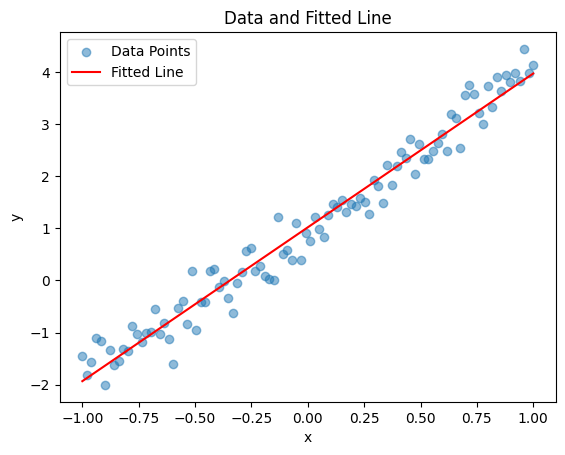

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate dataset
np.random.seed(0)  # For reproducibility
x = np.linspace(-1, 1, 100)  # 100 evenly spaced values from -1 to 1
epsilon = np.random.normal(0, np.sqrt(0.1), 100)  # Noise
y = 3*x + 1 + epsilon

# Define the error function
def error_function(w):
    w0, w1 = w
    return 0.5 * np.sum(((y - (x * w1 + w0)) / np.sqrt(0.1)) ** 2)

# Initial guess
w_initial = [0, 0]

# Minimize the error function
res = minimize(error_function, w_initial)

# Results
w0_opt, w1_opt = res.x
print(f"Optimal w0: {w0_opt}, Optimal w1: {w1_opt}")

# Plotting the error as a function of the number of updates is not directly possible
# without an iterative optimization process that records error at each step.
# Since we're using a direct optimization method (minimize), we don't have iterative updates.
# However, we can still plot the data and the fitted line.

plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, w1_opt * x + w0_opt, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Line')
plt.show()


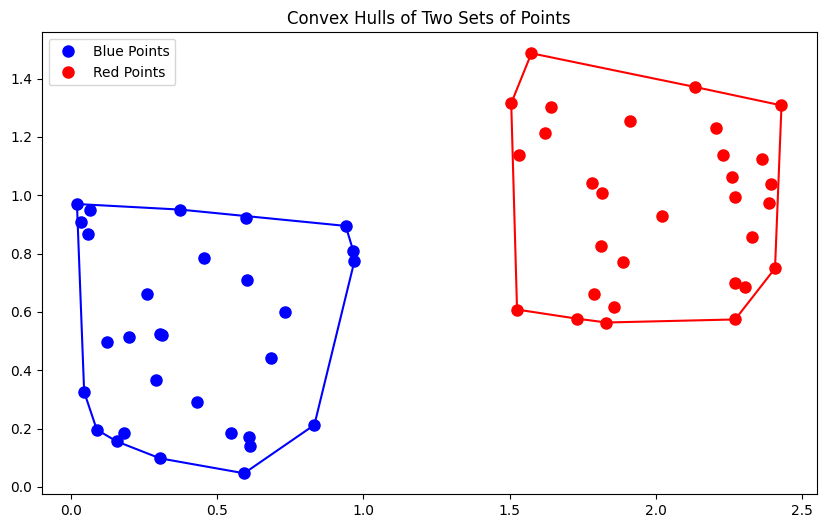

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Generating random points for two sets
np.random.seed(42)  # For reproducibility
blue_points = np.random.rand(30, 2)  # 30 random points for blue set
red_points = np.random.rand(30, 2) + np.array([1.5, 0.5])  # 30 random points for red set, offset to the right

# Compute the convex hulls for each set of points
blue_hull = ConvexHull(blue_points)
red_hull = ConvexHull(red_points)

# Plotting
plt.figure(figsize=(10, 6))

# Plot blue points and its convex hull
plt.plot(blue_points[:, 0], blue_points[:, 1], 'o', markersize=8, color='blue', label='Blue Points')
for simplex in blue_hull.simplices:
    plt.plot(blue_points[simplex, 0], blue_points[simplex, 1], 'b-')  # Hull edges

# Plot red points and its convex hull
plt.plot(red_points[:, 0], red_points[:, 1], 'o', markersize=8, color='red', label='Red Points')
for simplex in red_hull.simplices:
    plt.plot(red_points[simplex, 0], red_points[simplex, 1], 'r-')  # Hull edges

plt.title('Convex Hulls of Two Sets of Points')
plt.legend()
plt.show()


In [ ]:
from sympy import symbols, diff, solve

# Define symbols
w0, w1, x, y, sigma = symbols('w0 w1 x y sigma')

# Define the error function E
E = 1/2 * ((y - x*w1 - w0)/sigma)**2

# Take partial derivatives
dE_dw0 = diff(E, w0)
dE_dw1 = diff(E, w1)

# Solve the equations dE_dw0 = 0 and dE_dw1 = 0 for w0 and w1
# Note: To actually solve the system, we need the sums over all n. We're setting up the equations here
# to illustrate the process. Actual numerical solution would require data.

dE_dw0, dE_dw1


(0.5*(2*w0 + 2*w1*x - 2*y)/sigma**2, -1.0*x*(-w0 - w1*x + y)/sigma**2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-37c67ed5f1b7>:21: RuntimeWarning: overflow encountered in square
  return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)
<ipython-input-4-37c67ed5f1b7>:30: RuntimeWarning: overflow encountered in scalar divide
  grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-4-37c67ed5f1b7>:34: RuntimeWarning: invalid value encountered in scalar subtract
  w0 -= learning_rate * grad_w0


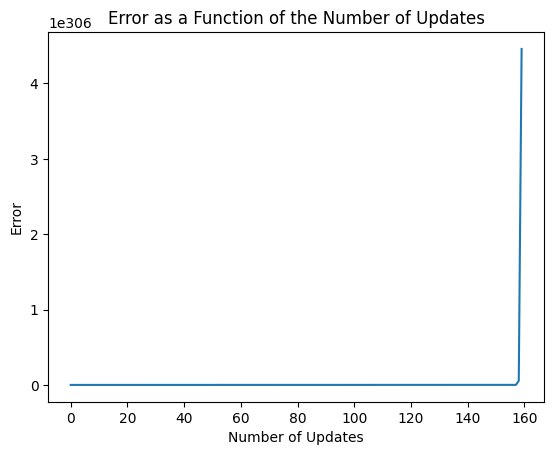

(nan, nan)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.01  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


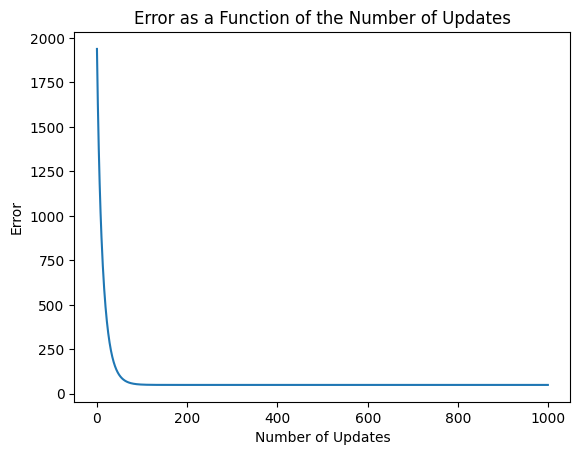

(1.0602788902914029, 2.990028551352027)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
np.random.seed(0)  # For reproducibility
N = 100  # Number of elements
sigma = np.sqrt(0.1)  # Standard deviation

# Generating dataset
x_n = np.random.uniform(-1, 1, N)  # Uniformly distributed x values between -1 and 1
epsilon_n = np.random.normal(0, sigma, N)  # Noise epsilon
y_n = 3*x_n + 1 + epsilon_n  # y values according to the given formula

# Initializing parameters
w0 = 0  # Initial guess for w0
w1 = 0  # Initial guess for w1
learning_rate = 0.0001  # Learning rate for updates

# Error function
def compute_error(w0, w1, x_n, y_n, sigma):
    return 0.5 * np.sum(((y_n - (x_n*w1 + w0))/sigma)**2)

# Gradient descent to update w0 and w1
error_history = []  # To track error over updates
for update in range(1000):  # Number of updates
    error = compute_error(w0, w1, x_n, y_n, sigma)
    error_history.append(error)

    # Gradients
    grad_w0 = np.sum((w0 + w1*x_n - y_n)) / (sigma**2)
    grad_w1 = np.sum(x_n * (w0 + w1*x_n - y_n)) / (sigma**2)

    # Update rules
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plotting the error as a function of the number of updates
plt.plot(error_history)
plt.xlabel('Number of Updates')
plt.ylabel('Error')
plt.title('Error as a Function of the Number of Updates')
plt.show()

w0, w1


Using GMM to model Cloud.dat

In [ ]:
#class RBFNet(nn.Module):
#    def __init__(self, centers, sigma):
#        super(RBFNet, self).__init__()
#        self.centers = nn.Parameter(centers)
#        self.sigmas = nn.Parameter(sigma)
#        self.linear = nn.Linear(centers.size(0), 1)  # Assuming binary classification

#    def forward(self, x):
        # Calculate the RBF activations for each neuron
#        diff = x[:, None, :] - self.centers[None, :, :]
#        dist_sq = torch.sum(diff ** 2, axis=-1)
#        out = torch.exp(-dist_sq / (2 * self.sigmas ** 2))
        # Linear combination for the output layer#
#        out = self.linear(out)
#        return out

# Define your RBF centers and sigmas
# centers = ...
# sigma = ...
# Initialize the RBF network
# rbfnet = RBFNet(centers, sigma)
# Train the RBF network
# ...


# Using Custom Parametric Model

In [ ]:
# First, let's load the data from 'cloud.dat' and inspect its contents.
import numpy as np

# Load the dataset
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Now let's define the conversion from Cartesian to polar coordinates.
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

# Convert the data to polar coordinates
r, theta = cartesian_to_polar(data[:, 0], data[:, 1])

# Analyze the distribution of the radius
mean_r = np.mean(r)
std_r = np.std(r)

# For this dataset, we can assume that the angle 'theta' is uniformly distributed around the circle,
# so we don't need to estimate any parameters for 'theta'.

# Define a model for the radius
def radius_density(r, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((r - mean)**2) / (2 * std**2))

# Estimate the probability density of the radius
radius_pdf = radius_density(r, mean_r, std_r)

# Display the mean and standard deviation of the radius
mean_r, std_r, radius_pdf[:5]  # Displaying only the first 5 values of the density for brevity



(1.267660186267401,
 0.6107883776853938,
 array([0.10226725, 0.65012728, 0.11561314, 0.43183632, 0.46924191]))

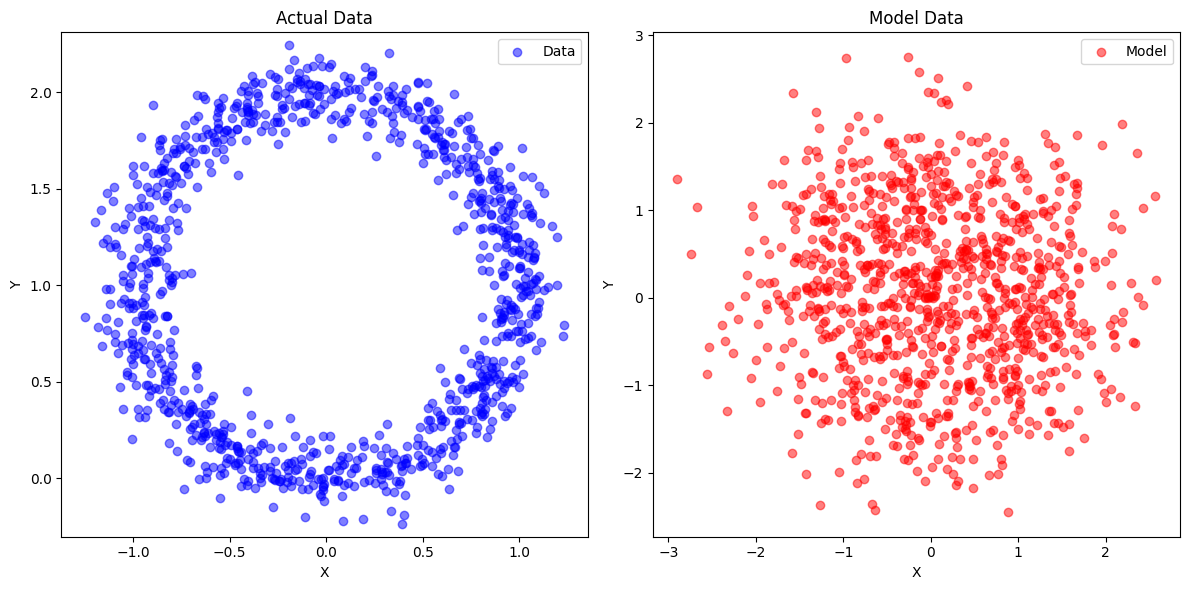

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data')
plt.axis('equal')
plt.legend()

# Generating model data
num_points = len(data)
theta_model = np.random.uniform(0, 2*np.pi, num_points)
r_model = np.random.normal(mean_r, std_r, num_points)
x_model = r_model * np.cos(theta_model)
y_model = r_model * np.sin(theta_model)

plt.subplot(1, 2, 2)
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Data')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


# Using Radial Basis Function (RBF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


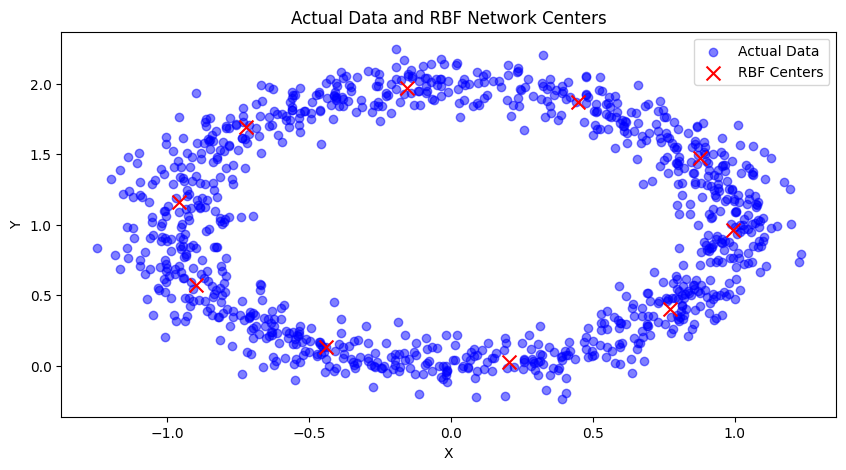

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.interpolate import RBFInterpolator
import numpy as np

# Load the dataset again
#data_path = 'cloud.dat'
data_path = 'https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/cloud.dat'
data = np.loadtxt(data_path)

# Prepare the data
X = data[:, :2]  # Input features (x, y coordinates)
y = np.zeros((len(data),))  # Dummy variable, since we're not doing prediction but fitting

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use KMeans to find centers for the RBFs
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_train)

# Define and train RBF Network
rbf_interpolator = RBFInterpolator(kmeans.cluster_centers_, y_train[:kmeans.n_clusters], kernel='gaussian', epsilon=1)

# Generate model data (we'll use the test set for this purpose)
y_model = rbf_interpolator(X_test)

# Since y is a dummy variable, we're interested in the fitting itself, not the prediction. Thus, we visualize the centers.
centers = kmeans.cluster_centers_

# Plotting the actual data and the RBF centers
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5, label='Actual Data')

# RBF Centers
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='RBF Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and RBF Network Centers')
plt.legend()
plt.show()


# Using Gaussian Mixture Model

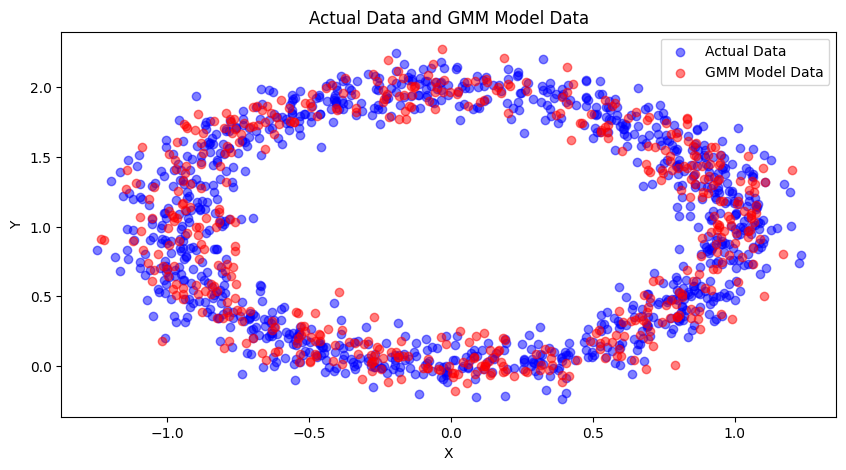

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 10 components to the data
gmm = GaussianMixture(n_components=10, random_state=42).fit(X)

# Predict the labels of the data points
labels = gmm.predict(X)

# Generate model data
# We'll sample 500 points from the GMM to serve as our model data
X_model, _ = gmm.sample(500)

# Plotting the actual data and the model data generated by the GMM
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data from GMM
plt.scatter(X_model[:, 0], X_model[:, 1], color='red', alpha=0.5, label='GMM Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and GMM Model Data')
plt.legend()
plt.show()


# Using Circular Regression Model

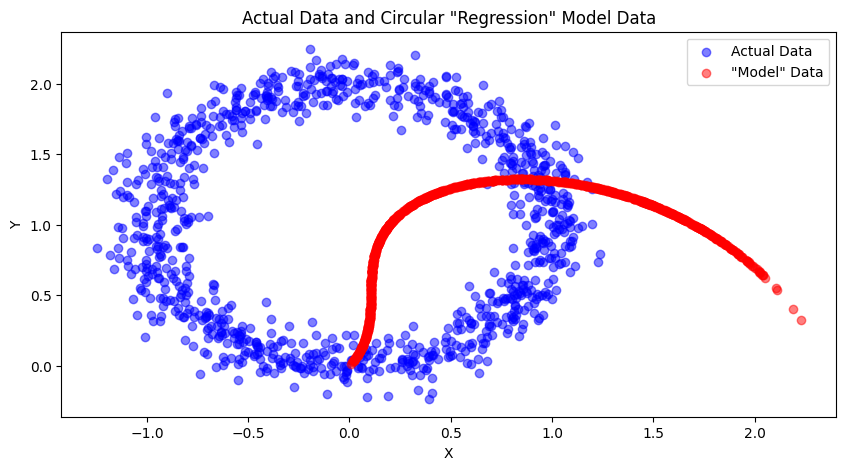

In [ ]:
# Calculate polar coordinates from the Cartesian coordinates of the actual data
r_data, theta_data = cartesian_to_polar(X[:, 0], X[:, 1])

# Illustrative model: Predict theta as a function of r (for visualization purposes)
# This is a simplistic and illustrative model, not a true circular regression
theta_model = np.sin(r_data) + np.cos(r_data)

# Convert the model theta back to Cartesian coordinates for visualization
x_model = r_data * np.cos(theta_model)
y_model = r_data * np.sin(theta_model)

# Plotting the actual data and the "model" data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# "Model" data
plt.scatter(x_model, y_model, color='red', alpha=0.5, label='"Model" Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Circular "Regression" Model Data')
plt.legend()
plt.show()


# Using Spectral Clustering

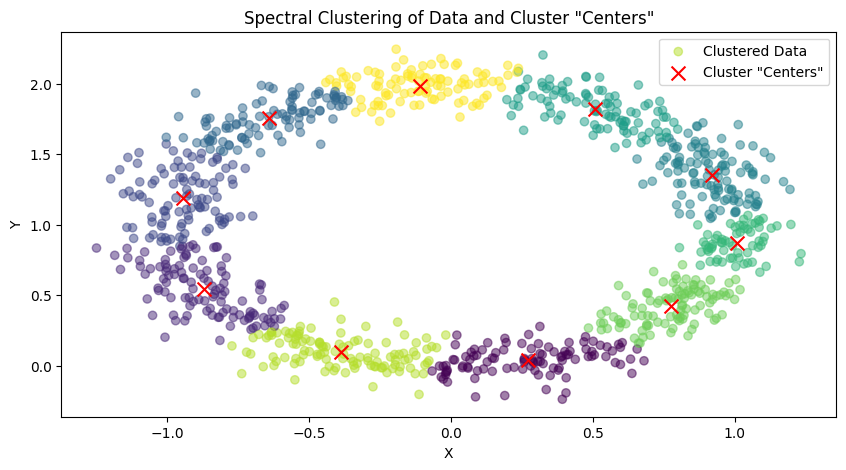

In [ ]:
from sklearn.cluster import SpectralClustering

# Perform spectral clustering on the data
# We choose 10 clusters to match the previous models for consistency
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# For visualization purposes, we'll use the cluster centers as a "model" of the data.
# Calculate the pseudo "centers" of the clusters
centers = np.array([X[labels == i].mean(axis=0) for i in range(10)])

# Plotting the actual data and the "centers" of the spectral clusters
plt.figure(figsize=(10, 5))

# Actual data with cluster coloring
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Clustered Data')

# Cluster "centers" determined by mean position
plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=100, label='Cluster "Centers"')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering of Data and Cluster "Centers"')
plt.legend()
plt.show()


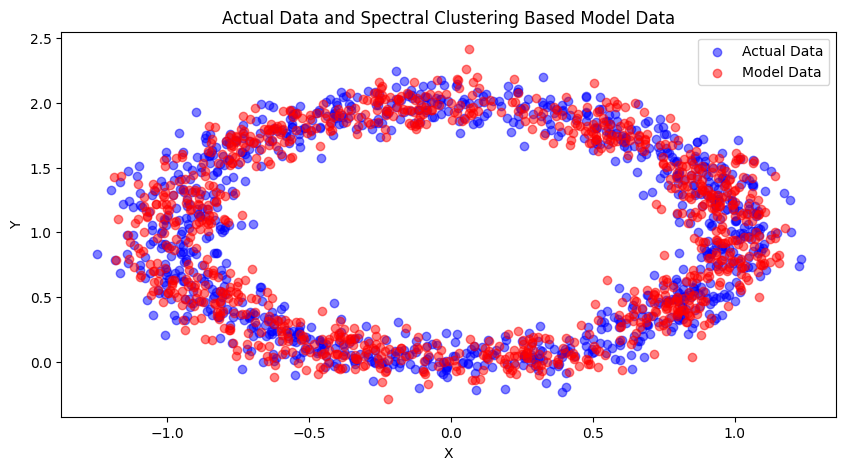

In [ ]:
from sklearn.covariance import EmpiricalCovariance
import numpy as np

# Initialize a list to hold the generated model data
model_data = np.empty((0, 2))

# For each cluster, estimate a Gaussian distribution and sample new data points
for i in range(10):
    cluster_points = X[labels == i]
    if len(cluster_points) == 0:
        continue  # Skip empty clusters, if any

    # Estimate the covariance of the current cluster
    cov_estimator = EmpiricalCovariance().fit(cluster_points)
    cov_matrix = cov_estimator.covariance_

    # Generate new points from a multivariate normal distribution based on the cluster's properties
    new_points = np.random.multivariate_normal(mean=centers[i], cov=cov_matrix, size=len(cluster_points))

    # Append the new points to the model data
    model_data = np.vstack((model_data, new_points))

# Plotting the actual data and the generated model data
plt.figure(figsize=(10, 5))

# Actual data
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Actual Data')

# Model data generated based on spectral clustering
plt.scatter(model_data[:, 0], model_data[:, 1], color='red', alpha=0.5, label='Model Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual Data and Spectral Clustering Based Model Data')
plt.legend()
plt.show()


# Deep Learning with a Custom Loss Function

In [ ]:
pip install tensorflow


In [ ]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
input_layer = Input(shape=(2,))  # Assuming 2D input data
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(2, activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)


In [ ]:
def custom_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    regularization_term = tf.reduce_mean(tf.square(tf.norm(encoded, axis=1) - 1))
    return reconstruction_loss + 0.01 * regularization_term


In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss)


In [ ]:
#history = autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model

class CustomEncodingLayer(Layer):
    def __init__(self, encoding_dim):
        super(CustomEncodingLayer, self).__init__()
        self.encoding_dim = encoding_dim
        self.dense = Dense(encoding_dim, activation='relu')

    def call(self, inputs):
        encoded = self.dense(inputs)
        # Compute regularization term directly here if needed
        return encoded

class CustomAutoencoder(Model):
    def __init__(self, encoding_dim, input_dim):
        super(CustomAutoencoder, self).__init__()
        self.encoder = CustomEncodingLayer(encoding_dim)
        self.decoder = Dense(input_dim, activation='linear')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

    def train_step(self, data):
        # Override train_step to compute and apply custom loss
        # Make sure to compute the regularization term correctly within the TensorFlow graph
        pass  # Implement training logic here


In [ ]:
import numpy as np

def cart_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def polar_to_cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Assuming 'data' is a NumPy array with x, y coordinates
r, theta = cart_to_polar(data[:, 0], data[:, 1])

# Estimate parameters for the radius distribution
mean_r = np.mean(r)
std_r = np.std(r)

# For theta, if it is uniformly distributed, we do not need to estimate any parameters

# Define the likelihood function
def likelihood(r, theta, mean_r, std_r):
    prob_r = np.exp(-(r - mean_r)**2 / (2 * std_r**2)) / (std_r * np.sqrt(2 * np.pi))
    prob_theta = 1 / (2 * np.pi)  # For uniform distribution
    return prob_r * prob_theta

# Parameter estimation could be performed here using an optimization method if necessary

# Predicting new data points
def predict(num_samples, mean_r, std_r):
    r = np.random.normal(mean_r, std_r, num_samples)
    theta = np.random.uniform(0, 2*np.pi, num_samples)
    x, y = polar_to_cart(r, theta)
    return x, y

# Generate new data points
num_samples = 100
predicted_x, predicted_y = predict(num_samples, mean_r, std_r)



# Using Support Vector Machine (SVM) with RBF Kernel to Model the Data

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np

# Assuming we're working with the same X data loaded previously

# Step 1: Preprocessing - Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: For demonstration, let's use the make_moons function to generate a binary classification dataset
# This is purely for demonstration; replace this with your actual labels if you have a labeled dataset
_, y_demo = make_moons(n_samples=len(X), noise=0.1, random_state=42)

# Step 3: Model Training - Train an SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_scaled, y_demo)

# Step 4: Visualization - We'll visualize the decision boundary along with the data
# Create a mesh to plot the decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid to find the decision boundaries
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_demo, edgecolors='k')
plt.title('SVM with RBF Kernel - Decision Boundary')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()


# Using Physicsbased or Geometrical Modeling

In [ ]:
from scipy import optimize

# Define the objective function for the best-fitting circle
def objective_function(circle, x):
    x_c, y_c, r = circle
    return ((x[:, 0] - x_c)**2 + (x[:, 1] - y_c)**2 - r**2)**2

# Initial guess for the circle's center and radius
initial_guess = [0.0, 0.0, 1.0]

# Perform the optimization to find the best-fitting circle
result = optimize.minimize(
    lambda circle: sum(objective_function(circle, X)),
    initial_guess,
    method='L-BFGS-B',  # Bounded optimization method suitable for this problem
    bounds=[(-np.inf, np.inf), (-np.inf, np.inf), (0, np.inf)]  # Radius must be non-negative
)

if result.success:
    fitted_circle = result.x
    print(f"Optimized Circle Parameters: Center = ({fitted_circle[0]}, {fitted_circle[1]}), Radius = {fitted_circle[2]}")
else:
    print("Optimization was not successful. Please check the data or initial guess.")

# Visualization of the fitted circle and the data points
circle = plt.Circle((fitted_circle[0], fitted_circle[1]), fitted_circle[2], color='r', fill=False)

fig, ax = plt.subplots()
ax.add_artist(circle)
ax.scatter(X[:, 0], X[:, 1], color='blue')
ax.set_aspect('equal', adjustable='datalim')
plt.title('Best-Fitting Circle to the Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Number of clusters found (excluding noise if present)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of points classified as noise: {n_noise}")

# Visualization of the clustering
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of the Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf


np.random.seed(0)  # For reproducibility
sigma_sq = 0.01  # Define the variance of the Gaussian noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Generate dataset
#np.random.seed(0)  # For reproducibility
#X = np.random.uniform(0, 1, 100)
#Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and compute centers for RBF
X_sorted = np.sort(X)
centers = np.array([np.mean(X_sorted[i:i+10]) for i in range(0, 100, 10)])

# Create RBF interpolator
#rbf_interpolator = Rbf(X, Y, centers, function='gaussian')

# Generate interpolating values
#X_interp = np.linspace(0, 1, 100)
#Y_interp = rbf_interpolator(X_interp)

# Plot the dataset and interpolating function
#plt.scatter(X, Y, label='Data Points')
#plt.plot(X_interp, Y_interp, color='red', label='Interpolating Function')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()

#plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

np.random.seed(0)  # For reproducibility
sigma_sq = 0.1  # Define the variance of the noise
X = np.random.uniform(0, 1, 100)
Y = 0.5 + 0.4 * np.sin(2 * np.pi * X) + np.random.normal(0, np.sqrt(sigma_sq), 100)

# Sort X and find the centers
X_sorted = np.sort(X)
X_subsets = np.array_split(X_sorted, 10)
centers = np.array([np.mean(x_subset) for x_subset in X_subsets])

# Make sure the centers are broadcasted to each data point in X for interpolation#


# Assuming that 'centers' should be used to compute the values of RBF at data points
rbf_values = np.zeros((len(X), len(centers)))
for i, center in enumerate(centers):
    rbf_values[:, i] = np.exp(-((X - center) ** 2) / (2 * sigma_sq))

# Compute the weights for the RBF network
weights = np.linalg.lstsq(rbf_values, Y, rcond=None)[0]

# Generate interpolating values
Y_interpolated = rbf_values @ weights

# Plotting the original data and the interpolating function
plt.scatter(X, Y, label='Original Data')
plt.plot(X_sorted, Y_interpolated[np.argsort(X)], label='Interpolated Function', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RBF Interpolation')
plt.show()


In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def linear(x):
    return x

def linear_derivative(x):
    return 1

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = linear(self.z2)
        return self.a2

    def compute_loss(self, predicted, target):
        return np.mean((predicted - target) ** 2)


In [ ]:
    def backward(self, x, y):
        m = y.shape[0]  # Number of examples
        dz2 = (self.a2 - y) / m
        dw2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, self.w2.T) * tanh_derivative(self.z1)
        dw1 = np.dot(x.T, dz1)
        db1 = np.sum(dz1, axis=0)

        return dw1, db1, dw2, db2


In [ ]:
def approximate_derivative(network, x, y, epsilon=1e-4):
    approx_derivatives = []
    # Approximate derivatives for weights and biases in layer 1
    for i in range(network.w1.size):
        w1_plus_eps = network.w1.copy()
        w1_plus_eps.flat[i] += epsilon
        loss_plus = network.compute_loss(network.forward(x), y)

        w1_minus_eps = network.w1.copy()
        w1_minus_eps.flat[i] -= epsilon
        loss_minus = network.compute_loss(network.forward(x), y)

        approx_derivative = (loss_plus - loss_minus) / (2 * epsilon)
        approx_derivatives.append(approx_derivative)

    # Similarly, add code for w2, b1, and b2 by following the same structure

    return approx_derivatives


In [ ]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Backward propagation
        error = self.forward(X) - y
        delta2 = error
        dw2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.w2.T) * (1 - np.tanh(self.z1) ** 2)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        return dw1, db1, dw2, db2

    def loss(self, y_pred, y_true):
        # Mean squared error loss
        return np.mean((y_pred - y_true) ** 2)

# Generate a dataset
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = np.random.randn(100, 1)  # 100 target values

# Initialize network
input_size = X.shape[1]
hidden_size = 5  # Number of hidden units
output_size = y.shape[1]
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Forward pass to compute initial loss
y_pred = network.forward(X)
initial_loss = network.loss(y_pred, y)

# Backward pass to compute gradients
dw1, db1, dw2, db2 = network.backward(X, y)

# Numerical gradient check
epsilon = 1e-5
network.w1 += epsilon
loss_plus_epsilon = network.loss(network.forward(X), y)
network.w1 -= 2 * epsilon
loss_minus_epsilon = network.loss(network.forward(X), y)
numerical_gradient_w1 = (loss_plus_epsilon - loss_minus_epsilon) / (2 * epsilon)
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_gradient_w1))

# Reset the weight after the check
network.w1 += epsilon

# Implement training loop, optimizer, etc., as needed.


In [ ]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # Forward pass
        y_pred = self.forward(X)
        # Backward pass
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = np.dot(self.a1.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)

        grad_a1 = np.dot(grad_y_pred, self.w2.T)
        grad_z1 = grad_a1 * (1 - self.a1 ** 2)
        grad_w1 = np.dot(X.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0)

        return grad_w1, grad_b1, grad_w2, grad_b2


In [ ]:
np.random.seed(0)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = np.random.randn(100, 1)  # 100 target values


In [ ]:
input_size = 3
hidden_size = 5
output_size = 1
network = TwoLayerNetwork(input_size, hidden_size, output_size)

# Compute back-propagation derivatives
dw1, db1, dw2, db2 = network.backward(X, y)

def compute_numerical_gradient(N, X, y, epsilon=1e-5):
    initial_w1 = np.copy(N.w1)
    grad_approx = np.zeros_like(N.w1)

    # Compute numerical gradient for w1
    for i in range(N.w1.shape[0]):
        for j in range(N.w1.shape[1]):
            N.w1 = np.copy(initial_w1)
            N.w1[i, j] += epsilon
            y_pred_plus = N.forward(X)

            N.w1 = np.copy(initial_w1)
            N.w1[i, j] -= epsilon
            y_pred_minus = N.forward(X)

            grad_approx[i, j] = (np.sum((y_pred_plus - y) ** 2) - np.sum((y_pred_minus - y) ** 2)) / (2 * epsilon)

    N.w1 = initial_w1  # Reset to original weights
    return grad_approx

# Compute numerical gradient
numerical_grad_w1 = compute_numerical_gradient(network, X, y)

# Compare gradients
print("Analytical Gradient:", np.linalg.norm(dw1))
print("Numerical Gradient:", np.linalg.norm(numerical_grad_w1))


In [ ]:
import numpy as np

class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def backward(self, X, y):
        # (Implement backward pass here)
        pass

    def compute_loss(self, y_pred, y_true):
        # Mean squared error
        return np.mean((y_pred - y_true) ** 2)

# (Continue with the rest of your implementation)


In [ ]:
# Initialize the network with the proper dimensions
network = TwoLayerNetwork(input_size=3, hidden_size=5, output_size=1)

# Generate synthetic data for testing
np.random.seed(42)
X_test = np.random.randn(10, 3)
y_test = np.random.randn(10, 1)

# Forward pass to get predictions
predictions = network.forward(X_test)

# Compute loss between predictions and actual values
loss = network.compute_loss(predictions, y_test)
print(f"Loss: {loss}")

# Add the backward pass and numerical gradient checking as needed


In [ ]:
#class TwoLayerNetwork:
 #   def __init__(self, input_size, hidden_size, output_size):
        # Initialization code as before

  #  def forward(self, X):
        # Forward pass code as before

   # def backward(self, X, y):
        # Backward pass code as before

    #def compute_loss(self, y_pred, y_true):
        # Mean Squared Error Loss
     #   return np.mean((y_pred - y_true) ** 2)


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

# Load the datasets
topo_lad_df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv')
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')

# Merge on the 'Local Authority' column to align the datasets
filtered_gdf_ = all_regions_data_.merge(topo_lad_df, left_on='Local Authority', right_on='LAD13NM')

import geopandas as gpd
from shapely import wkt

# Convert 'geometry' column from WKT to shapely geometries
topo_lad_df['geometry'] = topo_lad_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(topo_lad_df, geometry='geometry')

# Calculate centroids
gdf['centroid'] = gdf['geometry'].centroid

# Extract latitude and longitude from the centroids
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

def find_neighbors(gdf, threshold=10):  # Threshold in kilometers
    edges = []
    for index, row in gdf.iterrows():
        lat1, lon1 = row['latitude'], row['longitude']
        for j, candidate_row in gdf.iterrows():
            if index == j:
                continue  # Skip self
            lat2, lon2 = candidate_row['latitude'], candidate_row['longitude']
            distance = haversine(lat1, lon1, lat2, lon2)
            if distance <= threshold:
                edges.append((index, j))
    return edges


edges = find_neighbors(gdf, threshold=10)

import networkx as nx

# Initialize an empty graph
G = nx.Graph()

G.add_edges_from(edges)

for index, row in gdf.iterrows():
    G.add_node(index, label=row['LAD13NM'])

import matplotlib.pyplot as plt

# Define positions based on geographic coordinates
pos = {index: (row['longitude'], row['latitude']) for index, row in gdf.iterrows()}

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 10))
#nx.draw(G, pos, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color='lightblue', edge_color='gray', width=1)
plt.title('Graph of Local Authorities in Regions Based on Geographic Proximity')
plt.show()







In [ ]:
all_regions_data_ = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/all_regions_data_.csv')
all_regions_data_.to_csv('data_all.csv')

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        96194.42, 14592.43, 8323.91, 29913.27, 26291.81,
        18530.12, 30369.14, 15314.26, 12044.33,
        16825.96, 18244.97, 11604.42, 8275.61,
        37092.39, 31099.31, 55209.7, 26119.39, 17940.00,
        24410.05, 26321.27, 26681.51, 23179.05,
        6411.41, 22889.89, 24428.08, 19614.43, 22070.84,
        8733.09, 22128.51, 9923.38
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 100, edgecolor='#677B84', color='green', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


In [ ]:
# comaparing value of emissions in 2008 and 2021 within the West Midlands
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        22.24302938, 4.833818788, 3.573942347, 8.082658044, 8.716090557,
        4.65914505, 10.03008724, 5.058948897, 4.592740429,
        4.205247479, 4.246878523, 3.589356627, 2.550547152,
        4.562981508, 7.726843804, 15.29768205, 7.742818656, 5.539861496,
        6.425263586, 4.022515094, 7.089696852, 7.535507473,
        2.259172515, 6.762043361, 7.251229458, 6.182550494, 6.799014853,
        3.242063331, 7.54829273, 4.023811033
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] * 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)

topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

areas_to_visualize = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

West_Midlands_emissions_df = pd.DataFrame(areas_to_visualize)

filtered_gdf = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize["Local Authority"])]
filtered_gdf = filtered_gdf.merge(West_Midlands_emissions_df, left_on='LAD13NM', right_on='Local Authority')

filtered_gdf['ID'] = range(1, len(filtered_gdf) + 1)

fig, ax = plt.subplots(figsize=(10, 10))
filtered_gdf.plot(ax=ax, color='#BFC2C6', edgecolor='white')

filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

for idx, row in filtered_gdf.iterrows():
    ax.scatter(row['centroid'].x, row['centroid'].y, s=row['Emissions'] / 10, edgecolor='#677B84', color='red', alpha=0.6)

if 'ID' in filtered_gdf.columns:
    for idx, row in filtered_gdf.iterrows():
        plt.annotate(text=row['ID'], xy=(row['centroid'].x, row['centroid'].y),
                     xytext=(3, 3), textcoords="offset points", color='#58595B',
                     horizontalalignment='right', verticalalignment='bottom')

from matplotlib.patches import Patch
legend_labels = [Patch(label=f'{row["ID"]}: {row["LAD13NM"]}', color = '#677B84') for idx, row in filtered_gdf.iterrows()]

plt.legend(handles=legend_labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

ax.set_title('Proportional Symbol Map of West Midlands Emissions')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        6479.843254, 590.7181488, 553.0509167, 2126.445049, 1804.133429,
        1078.711366, 1540.103887, 800.7480549, 517.1105821,
        781.5119445, 658.2316275, 681.6360141, 544.7472592,
        884.3129309, 2016.055588, 2429.660141, 1397.038485, 720.6282332,
        966.2980986, 815.9472484, 1867.227433, 1039.667955,
        440.4468112, 1351.832403, 1608.017111, 1082.709203, 1596.687215,
        600.7787738, 989.2882638, 651.6125408
    ]
}

# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('2005 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data for the first visualization
areas_to_visualize_1 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        3622.665412, 401.3101363, 324.6981635, 1146.05309, 1010.346795,
        668.6848677, 1015.355413, 572.979797, 378.715238,
        550.6792211, 449.5586866, 413.9270139, 305.6812122,
        633.5693252, 1131.018151, 1646.632143, 909.0808695, 543.422038,
        616.1575224, 545.2636347, 1018.656851, 735.2235472,
        234.1949014, 801.7373521, 866.2604975, 634.5603213, 888.8938004,
        318.6142856, 717.256562, 382.6030346
    ]
}

# Data for the second visualization
areas_to_visualize_2 = {
    "Local Authority": [
        "Birmingham", "Bromsgrove", "Cannock Chase", "Coventry", "Dudley",
        "East Staffordshire", "Herefordshire, County of", "Lichfield", "Malvern Hills",
        "Newcastle-under-Lyme", "North Warwickshire", "Nuneaton and Bedworth", "Redditch",
        "Rugby", "Sandwell", "Shropshire", "Solihull", "South Staffordshire",
        "Stafford", "Staffordshire Moorlands", "Stoke-on-Trent", "Stratford-on-Avon",
        "Tamworth", "Telford and Wrekin", "Walsall", "Warwick", "Wolverhampton",
        "Worcester", "Wychavon", "Wyre Forest"
    ],
    "Emissions": [
        1811.332706, 200.6550682, 162.3490818, 573.0265451, 505.1733975,
        334.3424338, 507.6777067, 286.4898985, 189.357619,
        275.3396105, 224.7793433, 206.963507, 152.8406061,
        316.7846626, 565.5090754, 823.3160716, 454.5404348, 271.711019,
        308.0787612, 272.6318173, 509.3284256, 367.6117736,
        117.0974507, 400.8686761, 433.1302487, 317.2801606, 444.4469002,
        159.3071428, 358.628281, 191.3015173
    ]
}


# Read shapefile
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Prepare the dataframes
West_Midlands_emissions_df_1 = pd.DataFrame(areas_to_visualize_1)
West_Midlands_emissions_df_2 = pd.DataFrame(areas_to_visualize_2)

# Filtered GeoDataFrame for the first visualization
filtered_gdf_1 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_1["Local Authority"])]
filtered_gdf_1 = filtered_gdf_1.merge(West_Midlands_emissions_df_1, left_on='LAD13NM', right_on='Local Authority')

# Filtered GeoDataFrame for the second visualization
filtered_gdf_2 = topo_lad_gdf[topo_lad_gdf['LAD13NM'].isin(areas_to_visualize_2["Local Authority"])]
filtered_gdf_2 = filtered_gdf_2.merge(West_Midlands_emissions_df_2, left_on='LAD13NM', right_on='Local Authority')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for the first visualization
ax1 = axes[0]
filtered_gdf_1.plot(ax=ax1, color='#BFC2C6', edgecolor='white', legend=True)
ax1.set_title('2021 Emission Levels')
ax1.axis('off')

# Add markers for the first visualization
for idx, row in filtered_gdf_1.iterrows():
    centroid = row['geometry'].centroid
    ax1.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='red', alpha=0.6)

# Plot for the second visualization
ax2 = axes[1]
filtered_gdf_2.plot(ax=ax2, color='#BFC2C6', edgecolor='white', legend=True)
ax2.set_title('Goal for 2030 Emission Levels')
ax2.axis('off')

# Add markers for the second visualization
for idx, row in filtered_gdf_2.iterrows():
    centroid = row['geometry'].centroid
    ax2.scatter(centroid.x, centroid.y, s=row['Emissions'] / 2, edgecolor='#677B84', color='#5492CD', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install hvplot


In [ ]:
import pandas as pd
import numpy as np
import panel as pn

pn.extension('tabulator')

import hvplot.pandas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/GeneralContent/master/owid-co2-data-Copy.csv')

In [ ]:
df

In [ ]:
df[df['country'] == 'World']

In [ ]:
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!=0, df['gdp']/df['population'],0)

In [ ]:
idf = df.interactive()

In [ ]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

In [ ]:
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2','co2_per_capita',],
    button_type='success'
)

In [ ]:
continents = ['World','Asia','Oceania','Europe','Africa','North America','South America','Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider)&
        (idf.country.isin(continents))
    ]
    .groupby(['country','year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_pipeline

In [ ]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title='CO2 emission by continent ')
co2_plot

In [ ]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
co2_table

In [ ]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider)&
        (~(idf.country.isin(continents)))
    ]
    .groupby(['country','year','gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_vs_gdp_scatterplot_pipeline

In [ ]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', y='co2', by='country', size=80, kind='scatter', alpha=0.7, legend=False, height=500, width=500 )
co2_vs_gdp_scatterplot


In [ ]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2','oil_co2','gas_co2'],
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe','Africa','North America','Antarctica']
co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider)&
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year','country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [ ]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', x='country', y=yaxis_co2_source, title='CO2 source by continent')
co2_source_bar_plot

In [ ]:
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard',
    sidebar=[pn.pane.Markdown('# CO2 Emissions and Climate Change'),
             pn.pane.Markdown('#### Carbon dioxide emissions are the primary driver of global climate change. '),
             pn.pane.PNG('https://github.com/OlajideFemi/GeneralContent/blob/master/climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown('## Settings'),
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2,
                           co2_plot.panel(width=700), margin=(0,25)),
                  co2_table.panel(width=500)),
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)),
                           pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color='#88d8b0',
    header_background='#88d8b0',
)
template.servable();

In [ ]:
!pip install panel



In [ ]:
!pip install panel bokeh holoviews


In [ ]:
import panel as pn
import bokeh

# Initialize holoviews just in case it's used later
import holoviews as hv
hv.extension('bokeh')

# Now load the Panel extension for Bokeh
pn.extension()


In [ ]:
from bokeh.plotting import figure
import numpy as np

# Create a sample Bokeh plot
p = figure(title="Simple Bokeh Line Example", x_axis_label='x', y_axis_label='y')
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
p.line(x, y, legend_label="sin(x)")

# Create a Panel object to display the plot
bokeh_panel = pn.pane.Bokeh(p)

# Display the panel
bokeh_panel


In [ ]:
import panel as pn
pn.extension('bokeh')


In [ ]:
# Example of a simple Panel dashboard in Colab

import panel as pn
import numpy as np
import holoviews as hv

# Make sure Holoviews and Bokeh are working together
hv.extension('bokeh')

# Create some kind of interactive plot
scatter = hv.Scatter(np.random.randn(100, 2), kdims=['x'], vdims=['y']).opts(width=400, height=400, size=10)

# Create a Panel to display this plot
scatter_panel = pn.panel(scatter)

# Show the panel
scatter_panel.show()


In [ ]:
# Serve the panel object in Colab
scatter_panel.servable()


In [ ]:
pip install geopandas pandas hvplot panel


In [ ]:
import pandas as pd
import geopandas as gpd
import hvplot.pandas  # Extends Pandas DataFrame with hvplot method
import panel as pn

# Load your data
topo_lad_csv_path = 'https://raw.githubusercontent.com/OlajideFemi/OlajideFemi.github.io/index/topo_lad_1.csv'
topo_lad_df = pd.read_csv(topo_lad_csv_path)
topo_lad_gdf = gpd.GeoDataFrame(topo_lad_df, geometry=gpd.GeoSeries.from_wkt(topo_lad_df['geometry']))

# Assume you have a DataFrame 'df' ready with 'Year', 'Local Authority', and 'Emissions' columns
# Example DataFrame creation for illustration:
data = {
    "Year": [2021, 2030] * 15,
    "Local Authority": ["Birmingham", "Bromsgrove"] * 15,
    "Emissions": [3622.665, 401.310] * 15
}
df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = topo_lad_gdf.merge(df, on="Local Authority")

# Make DataFrame interactive
idf = gdf.interactive()

# Widgets
year_slider = pn.widgets.IntSlider(name='Year', start=2020, end=2030, step=1, value=2021)
yaxis_co2 = pn.widgets.RadioButtonGroup(name='Emissions Type', options=['CO2', 'NOx'], button_type='success')

# Plotting function
def plot_map(year, emission_type):
    data = idf[idf.Year == year]
    return data.hvplot(
        geo=True, c='Emissions', cmap='viridis', hover_cols=['Local Authority'],
        tiles='OSM', frame_width=700, frame_height=500,
        colorbar=True, toolbar='above', alpha=0.6
    )

# Dynamic map bound to widgets
dynamic_map = pn.bind(plot_map, year=year_slider, emission_type=yaxis_co2)

# Create Panel dashboard
dashboard = pn.Column(pn.Row(year_slider, yaxis_co2), dynamic_map)
dashboard.servable()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
import warnings

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the DataFrame by Date
df = df.sort_values('Date')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Final count'], marker='o', linestyle='-')
plt.title('Final Count Over Time')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.yticks(range(0, 450, 50))
plt.tight_layout()
plt.show()



In [ ]:
# Step 1: Trend Analysis - Seasonal Trends
# Aggregate data monthly
df_monthly = df.resample('M', on='Date').sum()

# Plot monthly aggregated data
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['Final count'], marker='o', linestyle='-')
plt.title('Monthly Aggregated Final Count')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Trend Analysis - Moving Average
# Calculate 4-week moving average
df['4_week_MA'] = df['Final count'].rolling(window=4).mean()

# Plot moving average
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Final count'], marker='o', linestyle='-', label='Final Count')
plt.plot(df['Date'], df['4_week_MA'], linestyle='-', color='orange', label='4-Week Moving Average')
plt.title('Final Count with 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# Step 2: Correlation Analysis (Conceptual)
# Since we do not have external data (weather, holidays), we'll discuss this conceptually

# Step 3: Segmentation Analysis
# Define thresholds for high and low attendance
high_threshold = df['Final count'].quantile(0.75)
low_threshold = df['Final count'].quantile(0.25)

# Segment data into high and low attendance periods
df['segment'] = pd.cut(df['Final count'], bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Print segmented data
print("Segmented Attendance Data:")
print(df)

# Step 4: Year-over-Year Comparison
# Extract year and month for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [ ]:

# Group by year and month
df_yoy = df.groupby(['Year', 'Month'])['Final count'].sum().unstack(level=0)

# Plot Year-over-Year comparison
df_yoy.plot(figsize=(10, 5), marker='o')
plt.title('Year-over-Year Comparison of Final Count')
plt.xlabel('Month')
plt.ylabel('Final Count')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [ ]:

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_if'] = iso_forest.fit_predict(df[['Final count']])

# Anomalies detected by Isolation Forest
anomalies_if = df[df['anomaly_if'] == -1]

# Print the anomalies
print("Isolation Forest Detected Anomalies:")
print(anomalies_if)

# Plotting with Isolation Forest anomalies highlighted
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Final count'], marker='o', linestyle='-', label='Final Count')
plt.scatter(anomalies_if['Date'], anomalies_if['Final count'], color='red', label='Anomalies (Isolation Forest)', zorder=5)
plt.title('Final Count Over Time with Isolation Forest Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Arima for Sunday attendance data

# Checking if data is stationary attendance data

# If non stationary, diffence the data till stationary

# subject to the count of times it took to get it stationary pick optimal d.

# run a grid for optimal pdq that achieves the best BIC and AIC

# using this optimal pdq model the arima

In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Final count']])

# Plotting clusters
plt.figure(figsize=(10, 5))
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Date'], cluster_data['Final count'], label=f'Cluster {cluster}')

plt.title('K-means Clustering of Attendance Data')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Print clustered data
print("Clustered Attendance Data:")
print(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Final count'], marker='o', linestyle='-')
plt.title('Final Count Over Time')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.yticks(range(0, 450, 50))
plt.tight_layout()
plt.show()

# Check if the data is stationary
result = adfuller(df['Final count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary, and we need to difference it
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Plot ACF and PACF
plot_acf(df['Final count'].dropna(), lags=20)
plot_pacf(df['Final count'].dropna(), lags=20)
plt.show()

# Define the p, d, and q parameters
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Find the best ARIMA model
aic_values = []
params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Final count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_values.append(results.aic)
            params.append((param, param_seasonal))
        except:
            continue

# Find the best parameters
best_params = params[aic_values.index(min(aic_values))]
print(f'Best ARIMA parameters: {best_params}')

# Fit the best ARIMA model
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Plotting the observed data and forecast
ax = df['Final count'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.index = forecast_index
pred_ci.index = forecast_index
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Final Count')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import statsmodels.api as sm

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set the Date column as the index
df.set_index('Date', inplace=True)

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit the best ARIMA model with selected parameters
best_params = ((4, 2, 0), (0, 4, 0, 12))
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import statsmodels.api as sm

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set the Date column as the index
df.set_index('Date', inplace=True)

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit the best ARIMA model with selected parameters
best_params = ((4, 2, 0), (0, 4, 0, 12))
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Plotting the observed data and forecast
plt.figure(figsize=(14, 7))
ax = df['Final count'].plot(label='Observed')
pred_uc.predicted_mean.index = forecast_index
pred_ci.index = forecast_index
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Final Count')
plt.title('Final Count Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
ax = df['Final count'].plot(label='Observed')
pred_uc.predicted_mean.index = forecast_index
pred_ci.index = forecast_index
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='orange')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Final Count')
plt.title('Final Count Forecast')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set the Date column as the index
df.set_index('Date', inplace=True)

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit the best ARIMA model with selected parameters
best_params = ((4, 2, 0), (0, 4, 0, 12))
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Forecast': pred_uc.predicted_mean.values,
    'Lower CI': pred_ci.iloc[:, 0].values,
    'Upper CI': pred_ci.iloc[:, 1].values
}, index=forecast_index)

# Print the observed data and the forecast
print("Observed Data:")
print(df['Final count'])

print("\nForecasted Data:")
print(forecast_df)


In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime and set frequency
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.asfreq('W-SUN')

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit the best ARIMA model with selected parameters
best_params = ((4, 2, 0), (0, 4, 0, 12))
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Forecast': pred_uc.predicted_mean.values,
    'Lower CI': pred_ci.iloc[:, 0].values,
    'Upper CI': pred_ci.iloc[:, 1].values
}, index=forecast_index)

# Print the observed data and the forecast
print("Observed Data:")
print(df['Final count'])

print("\nForecasted Data:")
print(forecast_df)


In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime and set frequency
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.asfreq('W-SUN')

# Fill missing values
df['Final count'].fillna(method='ffill', inplace=True)

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit the best ARIMA model with selected parameters
best_params = ((4, 2, 0), (0, 4, 0, 12))
best_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                       order=best_params[0],
                                       seasonal_order=best_params[1],
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Forecast': pred_uc.predicted_mean.values,
    'Lower CI': pred_ci.iloc[:, 0].values,
    'Upper CI': pred_ci.iloc[:, 1].values
}, index=forecast_index)

# Print the observed data and the forecast
print("Observed Data:")
print(df['Final count'])

print("\nForecasted Data:")
print(forecast_df)


In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime and set frequency
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.asfreq('W-SUN')

# Fill missing values
df['Final count'].fillna(method='ffill', inplace=True)

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit a simpler ARIMA model
simple_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                         order=(1, 1, 1),
                                         seasonal_order=(0, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
results = simple_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Forecast': pred_uc.predicted_mean.values,
    'Lower CI': pred_ci.iloc[:, 0].values,
    'Upper CI': pred_ci.iloc[:, 1].values
}, index=forecast_index)

# Print the observed data and the forecast
print("Observed Data:")
print(df['Final count'])

print("\nForecasted Data:")
print(forecast_df)


In [ ]:
import pandas as pd
import numpy as np

# Actual data provided by the user
actual_data = {
    "Date": [
        "28/04/2024", "05/05/2024", "12/05/2024", "19/05/2024", "26/05/2024", "02/06/2024"
    ],
    "Actual": [100, 111, 124, 115, 115, 113]
}

# Convert actual data to DataFrame
actual_df = pd.DataFrame(actual_data)
actual_df['Date'] = pd.to_datetime(actual_df['Date'], dayfirst=True)
actual_df.set_index('Date', inplace=True)

# Forecasted data
forecast_data = {
    "Date": [
        "2024-04-28", "2024-05-05", "2024-05-12", "2024-05-19", "2024-05-26", "2024-06-02"
    ],
    "Forecast": [
        119.959767, 151.954726, 93.277713, 110.024466, 131.357069, 94.373493
    ]
}

# Convert forecast data to DataFrame
forecast_df = pd.DataFrame(forecast_data)
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
forecast_df.set_index('Date', inplace=True)

# Merge actual and forecasted data
comparison_df = actual_df.merge(forecast_df, left_index=True, right_index=True)

# Calculate the Mean Absolute Error (MAE)
comparison_df['Error'] = abs(comparison_df['Actual'] - comparison_df['Forecast'])
mae = comparison_df['Error'].mean()

print("Comparison of Actual and Forecasted Data:")
print(comparison_df)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")


# Dealing with outlier to optimize model

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Data provided by the user
data = {
    "Date": [
        "04/12/2022", "11/12/2022", "18/12/2022", "08/01/2023", "15/01/2023", "29/01/2023", "05/02/2023",
        "12/02/2023", "26/02/2023", "12/03/2023", "26/03/2023", "02/04/2023", "23/04/2023", "14/05/2023",
        "21/05/2023", "28/05/2023", "04/06/2023", "11/06/2023", "18/06/2023", "25/06/2023", "02/07/2023",
        "09/07/2023", "16/07/2023", "23/07/2023", "30/07/2023", "06/08/2023", "20/08/2023", "27/08/2023",
        "03/09/2023", "10/09/2023", "17/09/2023", "24/09/2023", "01/10/2023", "08/10/2023", "15/10/2023",
        "22/10/2023", "29/10/2023", "05/11/2023", "12/11/2023", "19/11/2023", "26/11/2023", "03/12/2023",
        "10/12/2023", "17/12/2023", "24/12/2023", "14/01/2024", "21/01/2024", "28/01/2024", "11/02/2024",
        "18/02/2024", "25/02/2024", "03/03/2024", "10/03/2024", "17/03/2024", "24/03/2024", "07/04/2024",
        "14/04/2024", "21/04/2024"
    ],
    "Final count": [
        151, 134, 90, 213, 73, 190, 300, 219, 255, 136, 210, 131, 112, 102, 86, 138, 418, 113, 150, 104, 109,
        160, 77, 168, 94, 150, 76, 95, 122, 95, 151, 195, 123, 223, 98, 192, 152, 139, 160, 134, 63, 65, 155,
        113, 79, 151, 140, 143, 184, 176, 190, 174, 85, 75, 193, 62, 70, 64
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.asfreq('W-SUN')

# Fill missing values
df['Final count'].fillna(method='ffill', inplace=True)

# Detect and handle outliers using Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
df['Outlier'] = clf.fit_predict(df[['Final count']])

# Replace outliers with the median of the surrounding data points
median = df['Final count'].median()
df.loc[df['Outlier'] == -1, 'Final count'] = median
df.drop(columns=['Outlier'], inplace=True)

# Plot the data after handling outliers
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Final count'], marker='o', linestyle='-')
plt.title('Final Count Over Time (After Outlier Handling)')
plt.xlabel('Date')
plt.ylabel('Final Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# If necessary, difference the data to make it stationary
result = sm.tsa.adfuller(df['Final count'])
if result[1] > 0.05:
    df['Final count'] = df['Final count'].diff().dropna()

# Fit a simpler ARIMA model
simple_model = sm.tsa.statespace.SARIMAX(df['Final count'],
                                         order=(1, 1, 1),
                                         seasonal_order=(0, 1, 1, 12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
results = simple_model.fit()

# Forecasting
# Use the last date in the dataset for starting the prediction
start_date = df.index[-1]

# Forecast future steps
steps = 12  # forecast for 12 future steps
pred_uc = results.get_forecast(steps=steps)
pred_ci = pred_uc.conf_int()
forecast_index = pd.date_range(start=start_date, periods=steps + 1, freq='W')[1:]

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Forecast': pred_uc.predicted_mean.values,
    'Lower CI': pred_ci.iloc[:, 0].values,
    'Upper CI': pred_ci.iloc[:, 1].values
}, index=forecast_index)

# Print the observed data and the forecast
print("Observed Data:")
print(df['Final count'])

print("\nForecasted Data:")
print(forecast_df)


In [ ]:
import pandas as pd
import numpy as np

# Actual data provided by the user
actual_data = {
    "Date": [
        "28/04/2024", "05/05/2024", "12/05/2024", "19/05/2024", "26/05/2024", "02/06/2024"
    ],
    "Actual": [100, 111, 124, 115, 115, 113]
}

# Convert actual data to DataFrame
actual_df = pd.DataFrame(actual_data)
actual_df['Date'] = pd.to_datetime(actual_df['Date'], dayfirst=True)
actual_df.set_index('Date', inplace=True)

# Forecasted data
forecast_data = {
    "Date": [
        "2024-04-28", "2024-05-05", "2024-05-12", "2024-05-19", "2024-05-26", "2024-06-02"
    ],
    "Forecast": [
        118.719086, 126.678806, 128.065715, 144.692657, 154.572835, 117.590098
    ]
}

# Convert forecast data to DataFrame
forecast_df = pd.DataFrame(forecast_data)
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
forecast_df.set_index('Date', inplace=True)

# Merge actual and forecasted data
comparison_df = actual_df.merge(forecast_df, left_index=True, right_index=True)

# Calculate the Mean Absolute Error (MAE)
comparison_df['Error'] = abs(comparison_df['Actual'] - comparison_df['Forecast'])
mae = comparison_df['Error'].mean()

print("Comparison of Actual and Forecasted Data:")
print(comparison_df)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")


 Analysing key technologies such as wind, solar, nuclear and hydrogen to understand how they can help us to decarbonise our energy supply

In [ ]:
Row Labels	Sum of co2_per_capita
Afghanistan	9.525
Albania	111.049
Algeria	162.607
Andorra	209.122
Angola	40.359
Anguilla	273.172
Antarctica
Antigua and Barbuda	301.339
Argentina	299.431
Armenia	151.092
Aruba	974.313
Asia	158.352
Asia (excl. China & India)	221.127
Australia	1243.98
Austria	768.079
Azerbaijan	423.176
Bahamas	763.358
Bahrain	1731.58
Bangladesh	12.19
Barbados	205.917
Belarus	537.092
Belgium	1469.458
Belize	86.985
Benin	14.046
Bermuda	488.732
Bhutan	28.486
Bolivia	65.78
Bonaire Sint Eustatius and Saba	2500.446
Bosnia and Herzegovina	259.222
Botswana	88.415
Brazil	109.951
British Virgin Islands	259.203
Brunei	2068.496
Bulgaria	469.035
Burkina Faso	4.863
Burundi	2.05
Cambodia	11.755
Cameroon	15.514
Canada	1575.762
Cape Verde	31.534
Central African Republic	3.764
Chad	3.134
Chile	238.57
China	189.4
Christmas Island
Colombia	109.217
Comoros	10.002
Congo	27.858
Cook Islands	120.593
Costa Rica	73.536
Cote d'Ivoire	26.514
Croatia	246.086
Cuba	163.352
Curacao	3674.763
Cyprus	330.812
Czechia	1184.109
Democratic Republic of Congo	7.832
Denmark	875.478
Djibouti	44.529
Dominica	67.931
Dominican Republic	93.953
Ecuador	108.718
Egypt	99.695
El Salvador	43.341
Equatorial Guinea	190.642
Eritrea	6.547
Estonia	1194.142
Eswatini	47.77
Ethiopia	3.882
Faeroe Islands	677.807
Fiji	70.638
Finland	648.276
France	792.482
French Equatorial Africa
French Guiana	212.403
French Polynesia	139.287
French West Africa
Gabon	261.909
Gambia	11.832
Georgia	148.459
Germany	1299.111
Ghana	21.341
Greece	397.437
Greenland	666.151
Grenada	80.138
Guadeloupe	215.847
Guatemala	41.179
Guinea	11.89
Guinea-Bissau	9.076
Guyana	138.432
Haiti	9.679
High-income countries	1229.053
Honduras	42.808
Hong Kong	272.256
Hungary	511.326
Iceland	595.731
India	56.231
Indonesia	76.688
Iran	367.434
Iraq	235.623
Ireland	617.946
Israel	465.741
Italy	451.08
Jamaica	189.427
Japan	576.76
Jordan	145.654
Kazakhstan	1031.217
Kenya	19.823
Kiribati	26.688
Kosovo
Kuwait	1821.244
Kuwaiti Oil Fires
Kyrgyzstan	269.656
Laos	27.896
Latvia	408.508
Lebanon	192.917
Leeward Islands
Lesotho	32.134
Liberia	25.797
Libya	476.319
Liechtenstein	180.921
Lithuania	489.372
Lower-middle-income countries	85.819
Low-income countries	39.133
Luxembourg	1974.1
Macao	138.815
Madagascar	7.666
Malawi	6.334
Malaysia	271.989
Maldives	67.526
Mali	5.011
Malta	276.408
Marshall Islands	62.306
Martinique	241.007
Mauritania	29.543
Mauritius	101.584
Mayotte	34.638
Mexico	292.843
Micronesia (country)	34.633
Moldova	394.313
Mongolia	320.61
Montenegro	177.192
Montserrat	250.757
Morocco	65.056
Mozambique	13.393
Myanmar	16.612
Namibia	37.079
Nauru	560.159
Nepal	6.657
Netherlands	967.305
New Caledonia	908.709
New Zealand	677.397
Nicaragua	41.815
Niger	4.387
Nigeria	36.477
Niue	142.739
North America	1688.956
North America (excl. USA)	561.071
North Korea	283.292
North Macedonia	345.146
Norway	669.562
Oceania	938.622
Oman	462.518
Pakistan	38.953
Palau	685.616
Palestine	15.865
Panama	115.328
Panama Canal Zone
Papua New Guinea	30.332
Paraguay	35.719
Peru	115.241
Philippines	50.22
Poland	858.321
Portugal	273.038
Puerto Rico	0.145
Qatar	3288.008
Reunion	168.588
Romania	411.882
Russia	861.513
Rwanda	3.861
Ryukyu Islands
Saint Helena	64.363
Saint Kitts and Nevis	135.602
Saint Lucia	93.212
Saint Pierre and Miquelon	624.86
Saint Vincent and the Grenadines	65.507
Samoa	39.359
Sao Tome and Principe	24.448
Saudi Arabia	849.089
Senegal	26.713
Serbia	318.775
Seychelles	159.958
Sierra Leone	9.236
Singapore	623.406
Sint Maarten (Dutch part)	10510.974
Slovakia	898.017
Slovenia	453.786
Solomon Islands	27.87
Somalia	4.703
South Africa	706.75
South America	166.525
South Korea	396.197
South Sudan	5.89
Spain	393.542
Sri Lanka	28.567
St. Kitts-Nevis-Anguilla
Sudan	19.358
Suriname	272.971
Sweden	643.352
Switzerland	507.257
Syria	137.323
Taiwan	450.473
Tajikistan	148.724
Tanzania	8.375
Thailand	118.649
Timor	5.657
Togo	14.388
Tonga	45.48
Trinidad and Tobago	1503.924
Tunisia	102.675
Turkey	185.012
Turkmenistan	739.809
Turks and Caicos Islands	135.816
Tuvalu	27.777
Uganda	5.166
Ukraine	662.769
United Arab Emirates	1827.055
United Kingdom	1690.651
United States	2180.042
Upper-middle-income countries	267.443
Uruguay	124.081
Uzbekistan	384.474
Vanuatu	30.573
Venezuela	502.656
Vietnam	57.1
Wallis and Futuna	38.943
World	400.301
Yemen	45.468
Zambia	45.506
Zimbabwe	133.418


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map from Geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check the data
print(world.head())

# Aggregate by continent and count the number of countries in each continent
continent_counts = world.groupby('continent').size().reset_index(name='Number of Countries')

# Merge the count data with the world map data
world = world.merge(continent_counts, on='continent')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Number of Countries', ax=ax, legend=True,
           legend_kwds={'label': "Number of Countries",
                        'orientation': "horizontal"},
           cmap='Greens', edgecolor='black')

# Add title and show the plot
plt.title('Continents of the world based on number of countries')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/GeneralContent/master/owid-co2-data-Copy.csv')

In [ ]:
df

In [ ]:
df.to_csv('world_co2_data.csv')

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map from Geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check the data
world.to_csv('world_data.csv')

world.head()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from Geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map highlighting population estimate
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.title('World Population Estimate by Country')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/energy_consumption_flaabol.csv')
# Plot the data after handling outliers
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Consumption'], marker='o', linestyle='-')
#plt.plot(df['Consumption'], df['Consumption'], marker='o', linestyle='-')
plt.title('Daily Energy consumption estimate')
plt.xlabel('Date')
plt.ylabel('Consumption Estimates')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/heart.csv')

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OlajideFemi/Carbon-Footprint/main/2024-03-19_Government_Grants_Re.csv', encoding='ISO-8859-1')
df.head()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values if necessary
df = df.dropna()

# Convert dates to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])



In [ ]:
# Aggregate data by sector
sector_analysis = df.groupby('COFOG: Sector type')['FY value'].sum().reset_index()

# Aggregate data by allocation method
allocation_analysis = df.groupby('Allocation method')['FY value'].sum().reset_index()

# Time series analysis of grant values
time_series = df.set_index('Start Date').resample('M')['FY value'].sum().reset_index()
